# This notebook demonstrates the bike sharing data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bike_sharing.csv')
#df = pd.read_csv('dataset/bike_sharing.csv')
df.describe()

,year,month,hour,holiday,weekday,workingday,temp,feel_temp,humidity,windspeed,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,20.376474,23.788755,0.627229,12.736540,189.463088
std,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,7.894801,8.592511,0.192930,8.196795,181.387599
min,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,13.940000,16.665000,0.480000,7.001500,40.000000
50%,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,20.500000,24.240000,0.630000,12.998000,142.000000
75%,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,27.060000,31.060000,0.780000,16.997900,281.000000
max,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,41.000000,50.000000,1.000000,56.996900,977.000000


In [3]:
random_entries = df.sample(n=5, random_state=42)

print("5 Random Entries from the Dataset:")
print(random_entries)

5 Random Entries from the Dataset:
       season  year  month  hour  holiday  weekday  workingday weather   temp  \
12830    fall  2012      6    19        0        6           0   clear  32.80   
8688   spring  2012      1    20        1        1           0   clear   9.84   
7091   winter  2011     10     2        0        5           1   clear  13.12   
12230  summer  2012      5    19        0        2           1   clear  31.98   
431    spring  2011      1     0        0        4           1   clear  10.66   

       feel_temp  humidity  windspeed  count  
12830     34.850      0.27    12.9980    425  
8688      11.365      0.41    15.0013     88  
7091      15.150      0.66    19.0012      4  
12230     35.605      0.52    23.9994    526  
431       11.365      0.56    26.0027     13  


Let me do some simple data exploration first

In [4]:
df.dtypes[df.dtypes != 'object']

year            int64
month           int64
hour            int64
holiday         int64
weekday         int64
workingday      int64
temp          float64
feel_temp     float64
humidity      float64
windspeed     float64
count           int64
dtype: object

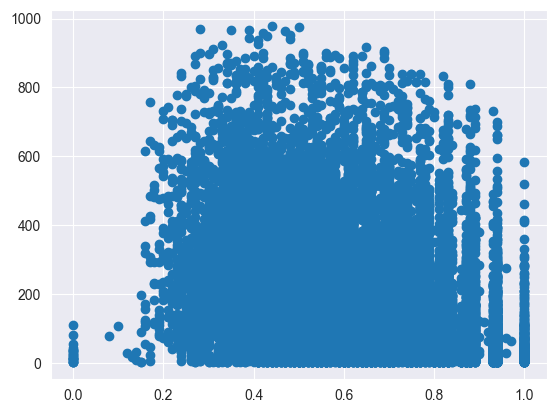

In [5]:
plt.scatter(x='humidity', y='count', data=df)

In [6]:
df_humidity_0 = df.query('humidity == 0.0')

# these entries have humidity as 0 but the weather being listed as rainy or misty. Very sus.
# After taking a deeper look I noticed that all data are from the same day. something must be wrong at that day. It is fully reasonable to drop those data.

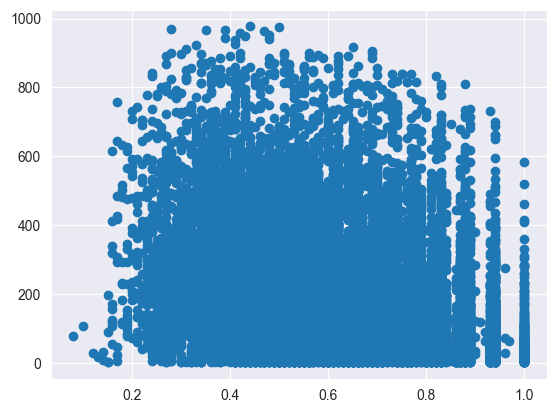

In [7]:
#Let me drop them for better fitting
df = df[df['humidity'] != 0.0]
plt.scatter(x='humidity', y='count', data=df)

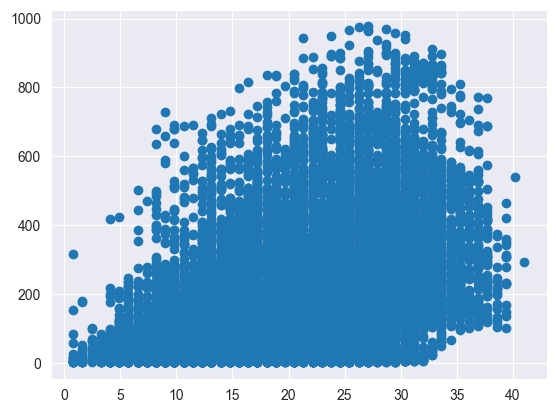

In [8]:
plt.scatter(x='temp', y='count', data=df)

In [9]:
df.query('temp < 1')
# people going to work at 8, it is reasonable to me. (that highest dot near 0 on x-axis is on 8am, which i tried to eliminate)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
483,spring,2011,1,4,0,6,0,misty,0.82,0.760,0.48,19.9995,3
484,spring,2011,1,6,0,6,0,misty,0.82,1.515,0.44,15.0013,2
485,spring,2011,1,7,0,6,0,clear,0.82,0.760,0.44,19.0012,8
486,spring,2011,1,8,0,6,0,clear,0.82,0.000,0.44,22.0028,27
504,spring,2011,1,2,0,0,0,clear,0.82,3.030,0.62,8.9981,18
505,spring,2011,1,3,0,0,0,clear,0.82,3.030,0.62,8.9981,5
528,spring,2011,1,4,0,1,1,clear,0.82,3.030,0.48,8.9981,1
529,spring,2011,1,5,0,1,1,clear,0.82,3.030,0.48,8.9981,5
530,spring,2011,1,6,0,1,1,clear,0.82,3.790,0.48,6.0032,15
531,spring,2011,1,7,0,1,1,clear,0.82,6.060,0.48,0.0000,84


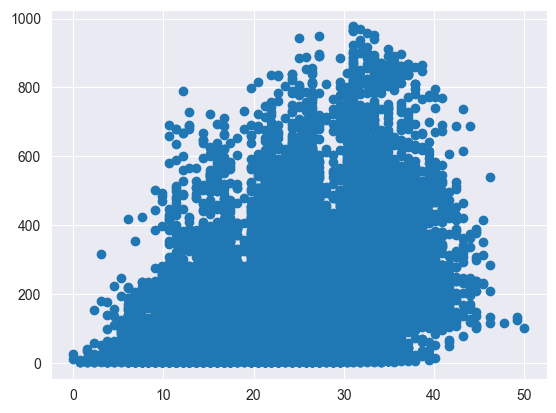

In [10]:
plt.scatter(x='feel_temp', y='count', data=df)

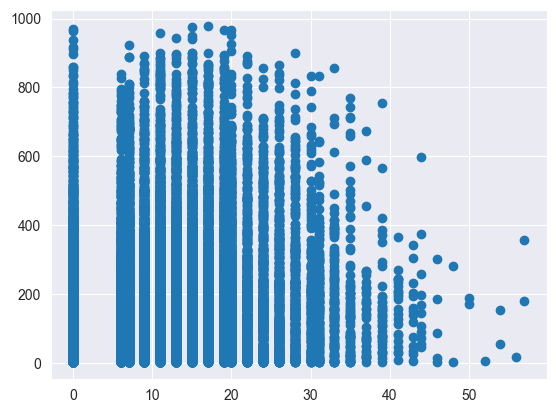

In [11]:
plt.scatter(x='windspeed', y='count', data=df)
#what's going on with windspeed between 1 and maybe 5?

In [12]:
df.query('windspeed == 0')

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,2011,1,0,0,6,0,clear,9.84,14.395,0.81,0.0,16
1,spring,2011,1,1,0,6,0,clear,9.02,13.635,0.80,0.0,40
2,spring,2011,1,2,0,6,0,clear,9.02,13.635,0.80,0.0,32
3,spring,2011,1,3,0,6,0,clear,9.84,14.395,0.75,0.0,13
4,spring,2011,1,4,0,6,0,clear,9.84,14.395,0.75,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,spring,2012,12,12,0,6,0,rain,8.20,12.120,1.00,0.0,48
17320,spring,2012,12,13,0,6,0,rain,8.20,12.120,1.00,0.0,84
17322,spring,2012,12,15,0,6,0,misty,9.84,12.120,0.87,0.0,129
17330,spring,2012,12,23,0,6,0,misty,10.66,12.120,0.60,0.0,32


In [13]:
# Let's see if there are some underlying structures that correlates to other features
print("Correlation Matrix (Pearson):")
df_windspeed_0 = df.query('windspeed == 0.0')
corr_matrix = df_windspeed_0[['month','hour','holiday','weekday','workingday', 'temp', 'humidity', 'count']].corr()
print(corr_matrix)

Correlation Matrix (Pearson):
               month      hour   holiday   weekday  workingday      temp  \
month       1.000000  0.003273  0.050382 -0.044930   -0.031367  0.105178   
hour        0.003273  1.000000 -0.004224  0.006620   -0.027680  0.089906   
holiday     0.050382 -0.004224  1.000000 -0.082799   -0.273474  0.031756   
weekday    -0.044930  0.006620 -0.082799  1.000000    0.047463  0.009592   
workingday -0.031367 -0.027680 -0.273474  0.047463    1.000000  0.059482   
temp        0.105178  0.089906  0.031756  0.009592    0.059482  1.000000   
humidity    0.182893 -0.309381 -0.037187 -0.018563    0.051118 -0.173287   
count       0.057257  0.391991 -0.012959  0.025464    0.012132  0.343535   

            humidity     count  
month       0.182893  0.057257  
hour       -0.309381  0.391991  
holiday    -0.037187 -0.012959  
weekday    -0.018563  0.025464  
workingday  0.051118  0.012132  
temp       -0.173287  0.343535  
humidity    1.000000 -0.357994  
count      -0.357994 

In [31]:
df.query('windspeed != 0').sort_values(by='windspeed', ascending=True)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count,humidity_cont
7698,3,2011,11,9,0,2,1,3,16.40,20.455,0.94,0.783086,149,0.952466
10111,1,2012,3,9,0,5,1,0,12.30,16.665,0.81,0.962192,314,0.796350
5676,0,2011,8,23,0,1,1,0,24.60,30.305,0.60,1.054820,75,0.581306
7846,3,2011,11,14,0,1,1,0,24.60,31.060,0.56,1.309421,143,0.557582
14514,0,2012,9,23,0,6,0,0,27.06,29.545,0.89,1.419595,145,0.875952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1,2011,2,15,0,5,1,0,18.86,22.725,0.41,54.192552,55,0.414099
9956,1,2012,2,21,0,5,1,0,17.22,21.210,0.35,54.387675,152,0.340176
5635,0,2011,8,17,0,6,0,3,26.24,28.790,0.89,55.147348,16,0.877233
4315,0,2011,7,17,0,0,0,3,32.80,37.120,0.49,57.065622,358,0.510401


the sensor might have some rounding problem:
* There is no value between 0 and 6.0032
* The windspeed data are discrete.

__Strategy:__ try to predict the windspeed data  _windspeed<6.0032_ using current dataset.


In [15]:
#Need to encode some object datatypes
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['season', 'weather']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

C:\Users\Yan\AppData\Local\Temp\ipykernel_21604\1493555083.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zero['windspeed_predicted'] = predicted


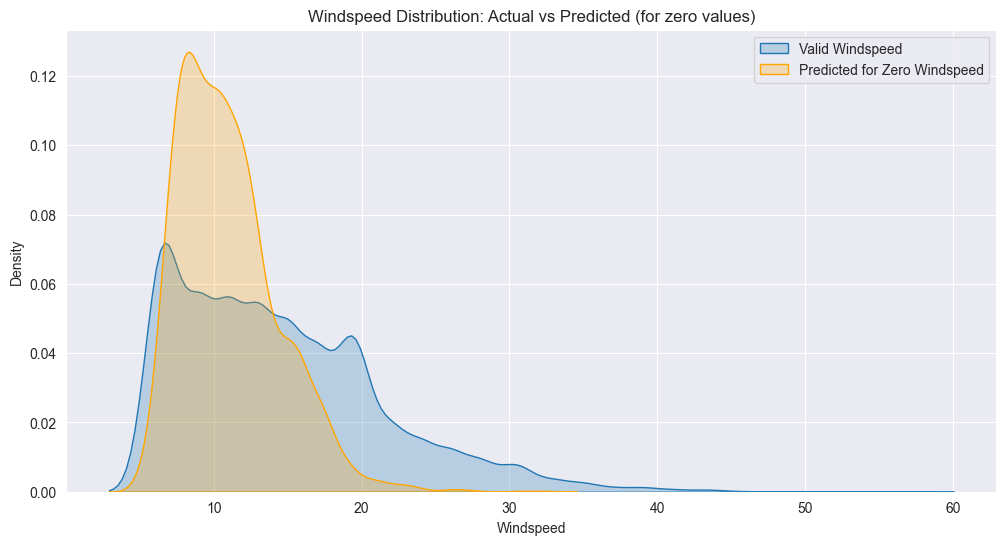

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_valid = df[df['windspeed'] != 0]
df_zero = df[df['windspeed'] == 0]

features = ['season', 'weather', 'humidity', 'hour', 'workingday', 'holiday', 'weekday', 'month','temp', 'feel_temp']

X_train = df_valid[features]
y_train = df_valid['windspeed']
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and replace
X_pred = df_zero[features]
predicted = model.predict(X_pred)

# Optionally add noise
predicted += np.random.normal(0, 0.5, size=predicted.shape)

# Store predicted for visualization
df_zero['windspeed_predicted'] = predicted

# Step 4: Visualization

plt.figure(figsize=(12, 6))

# Plot actual (non-zero) windspeed
sns.kdeplot(df_valid['windspeed'], label='Valid Windspeed', fill=True)

# Plot predicted windspeed
sns.kdeplot(df_zero['windspeed_predicted'], label='Predicted for Zero Windspeed', fill=True, color='orange')

plt.title("Windspeed Distribution: Actual vs Predicted (for zero values)")
plt.xlabel("Windspeed")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

It doesn't feel right. I did a bit reasearch, turns out windspeed is oftentimes a weilbull distribution.
I can try to let it fit into a weibull distribution and then we will have our entries with windspeed < 6.0032.

In [17]:
# Only apply to values that are not zero or flawed
non_flawed_mask = df['windspeed'] > 6.0032

# Add small Gaussian noise to make it continuous
np.random.seed(42)
df.loc[non_flawed_mask, 'windspeed'] += np.random.normal(loc=0, scale=0.3, size=non_flawed_mask.sum())

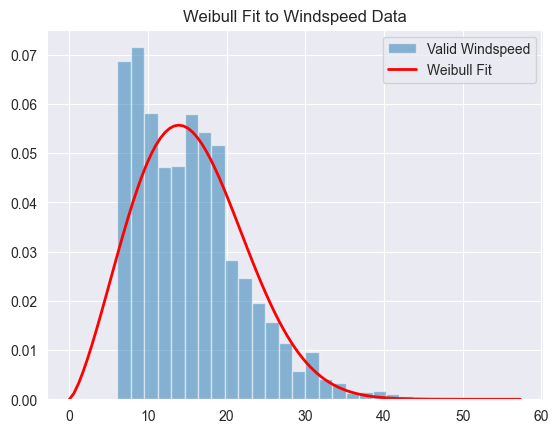

In [18]:
from scipy.stats import weibull_min
# Use valid windspeed values (>6.0032)
valid_ws = df[df['windspeed'] > 6.0032]['windspeed']

# Fit Weibull distribution
shape, loc, scale = weibull_min.fit(valid_ws, floc=0)

# Sample new values
num_flawed = df[df['windspeed'] <= 6.0032].shape[0]
sampled_ws = weibull_min.rvs(shape, loc=loc, scale=scale, size=num_flawed)

# Optional: Clip outliers
sampled_ws = np.clip(sampled_ws, 0.1, df['windspeed'].max())

# Replace the flawed entries
df.loc[df['windspeed'] <= 6.0032, 'windspeed'] = sampled_ws

# Plot to visualize
x = np.linspace(0, valid_ws.max(), 100)
pdf = weibull_min.pdf(x, shape, loc=loc, scale=scale)

plt.hist(valid_ws, bins=30, density=True, alpha=0.5, label='Valid Windspeed')
plt.plot(x, pdf, 'r-', lw=2, label='Weibull Fit')
plt.legend()
plt.title("Weibull Fit to Windspeed Data")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Now try to train the data using all features
X = df.drop(columns=['count'])
y = df['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_lr = model.predict(X_test_scaled)


r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = mse ** 0.5

print("Linear Regression Results:")
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")

Linear Regression Results:
R-squared: 0.3868
Mean squared error: 19769.0663
Root mean squared error: 140.6025


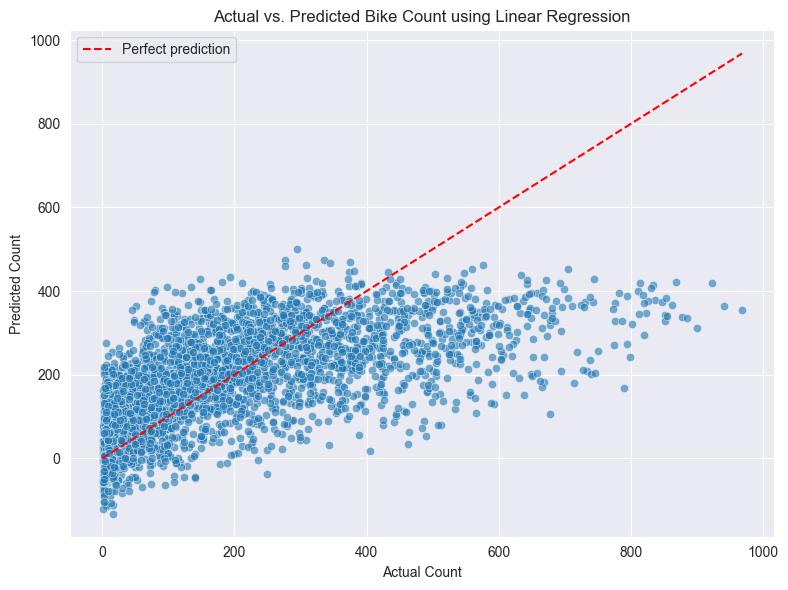

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)

# 2. Plot the ideal line (perfect prediction)
max_val = max(y_test.max(), y_pred_lr.max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect prediction')

plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted Bike Count using Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42, max_depth=10)  # max_depth can help prevent overfitting
tree.fit(X_train, y_train)

y_pred_dt = tree.predict(X_test)

r2 = r2_score(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)

print("Decision trees Results:")
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")

Decision trees Results:
R-squared: 0.8835
Mean squared error: 3756.0073
Root mean squared error: 61.2863


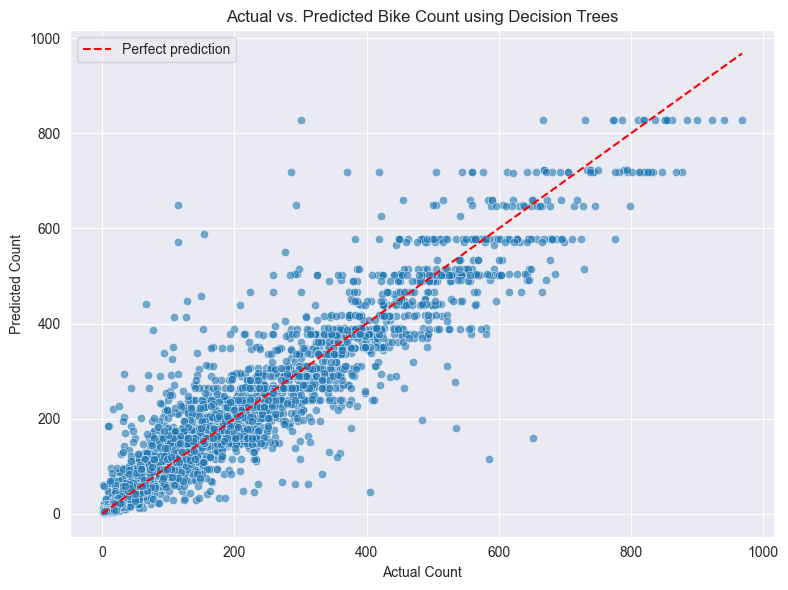

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.6)

# 2. Plot the ideal line (perfect prediction)
max_val = max(y_test.max(), y_pred_dt.max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect prediction')

plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted Bike Count using Decision Trees')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forrest Results:")
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")

Random Forrest Results:
R-squared: 0.9369
Mean squared error: 2033.5097
Root mean squared error: 45.0945


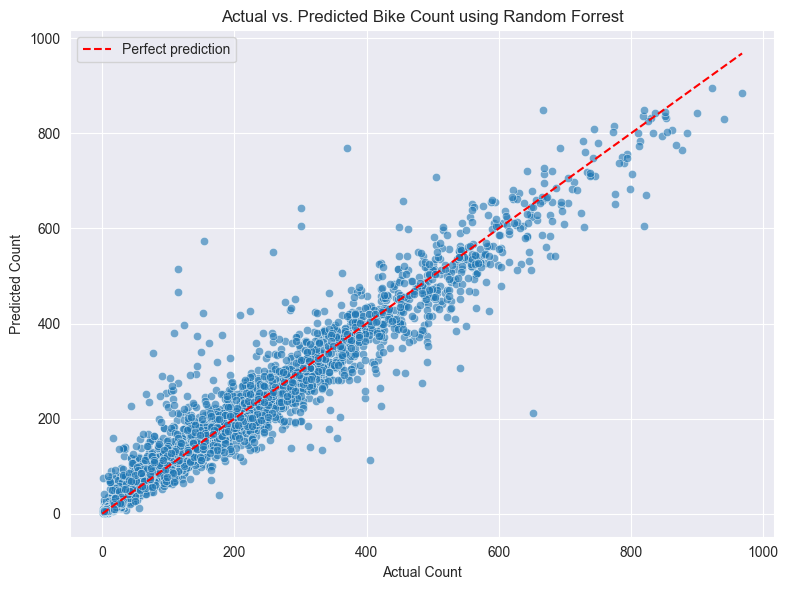

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)

max_val = max(y_test.max(), y_pred_rf.max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect prediction')

plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted Bike Count using Random Forrest')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Humidity data remains discrete and quantized. Look at the humidity level on and near 1.0. It doesn't feel natural at all.
Let me dequantize them.

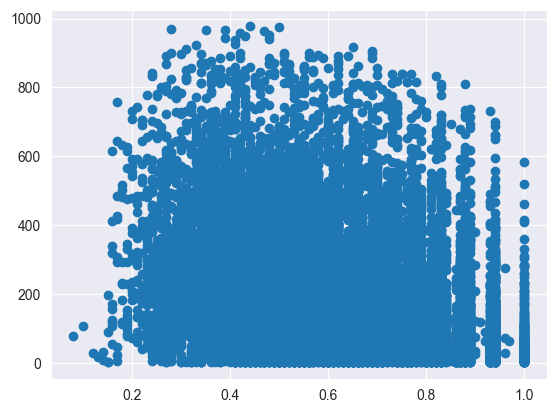

In [25]:
# revisit the humidity feature
plt.scatter(x='humidity', y='count', data=df)

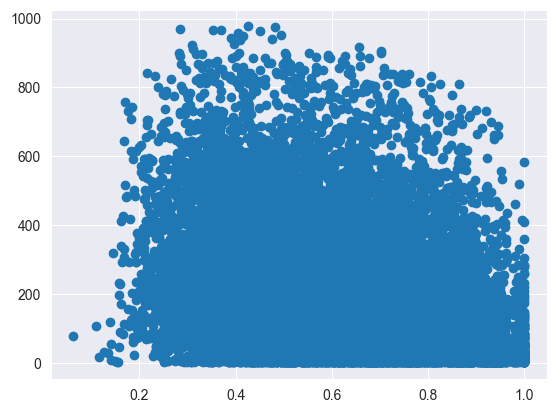

In [26]:
# I need to de-quantize them, which might lead to a better fitting.

np.random.seed(42)

# Add small noise between -0.02 and 0.02 to the humidity values
df['humidity_cont'] = df['humidity'] + np.random.uniform(-0.025, 0.025, size=len(df))

# Clip values to stay between 0 and 1
df['humidity_cont'] = np.clip(df['humidity_cont'], 0.0, 1.0)

plt.scatter(x='humidity_cont', y='count', data=df)

Now checking the metrics. The improvement is marginal.

In [27]:
#Let's train our model again using the dequantized data.
X = df.drop(columns=['count'])
y = df['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_lr = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = mse ** 0.5

print("Linear Regression Results:")
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")

Linear Regression Results:
R-squared: 0.3868
Mean squared error: 19769.0163
Root mean squared error: 140.6023


In [28]:
tree = DecisionTreeRegressor(random_state=42, max_depth=10)  # max_depth can help prevent overfitting
tree.fit(X_train, y_train)

y_pred_dt = tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

print("Decision trees Results:")
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")

Decision trees Results:
R-squared: 0.8827
Mean squared error: 3781.1522
Root mean squared error: 61.4911


In [29]:
rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forrest Results:")
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")

Random Forrest Results:
R-squared: 0.9373
Mean squared error: 2021.6949
Root mean squared error: 44.9633


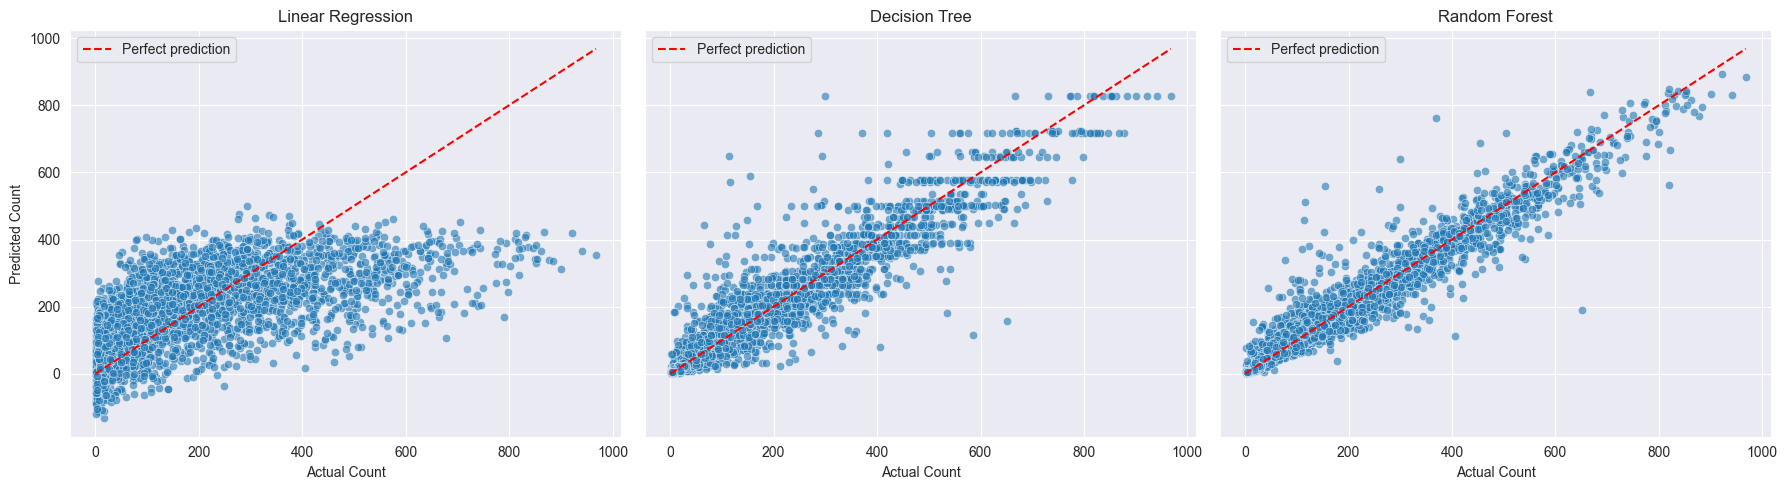

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

models = [
    ('Linear Regression', y_pred_lr),
    ('Decision Tree', y_pred_dt),
    ('Random Forest', y_pred_rf)
]

max_val = max(y_test.max(), y_pred_lr.max(), y_pred_dt.max(), y_pred_rf.max())

for ax, (title, y_pred) in zip(axes, models):
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=ax)
    ax.plot([0, max_val], [0, max_val], 'r--', label='Perfect prediction')
    ax.set_title(title)
    ax.set_xlabel('Actual Count')
    ax.set_ylabel('Predicted Count')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

### I did following tasks
1. picking out the outliers for humidity==0.0, because all these entries have either rainy or misty on weather. I think those data are corrupt.
2. De-quantize the humidity feature using random noise injection.
3. De-quantize the windspeed feature by trying to predict the lost value between windspeed from 0 to 6.0032 based on weibull distribution. (I also tried to fit into normal distribution but i dont think that fit well.)
4. training on linear regression, decision trees and random forrest. Calculating the metrics.
5. Visualization

### Interpretation
It seems that Decision Tree and Random Forrest work way better than simple linear regression. My interpretation are listed as follows:
* The features in bike-sharing are not completely linear, or to be precise, has relatively more non-linear relationships.
* I think generally speaking, Decision Trees and random forrest are simply more computation-heavy hence the higher complexity, which makes them more powerful for finding the underlying structure.